# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [4]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [42]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", na_values=["Unknown", "UNKNOWN"], nrows=30000)
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [43]:
df.shape
#orginally 81937 rows
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [44]:
#each row is a dog that is currently licensed in NYC
#is_vaccinated lists whether the dog has been vaccinated or not
#license_issued_date shows when the dog was orginally licensed

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [45]:
#how many dogs are spayed/neutered?
#how many black dogs are in NYC?
#Are most of the dogs trained?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<Axes: ylabel='Primary Breed'>

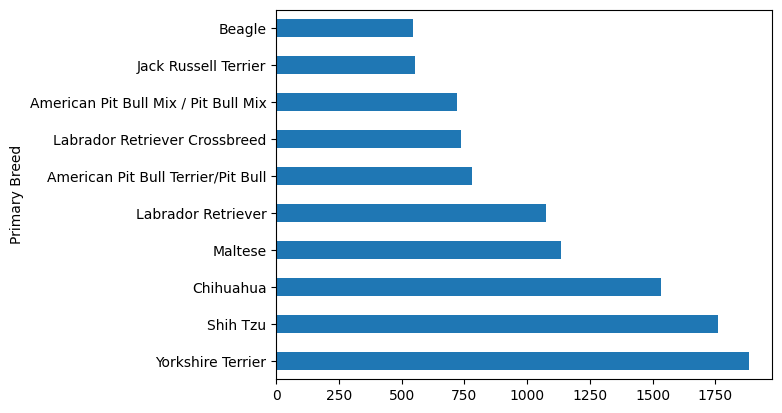

In [46]:
#top ten primary breed
df["Primary Breed"].value_counts().head(10).plot(kind="barh")

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

...maybe "unknown" should just count as missing data?

<Axes: ylabel='Primary Breed'>

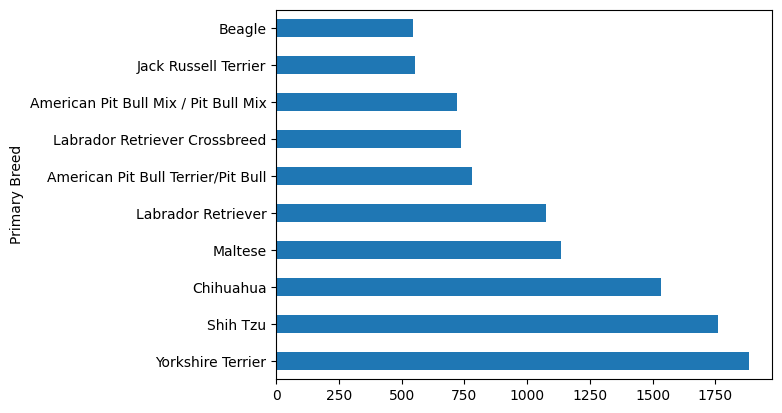

In [47]:
df["Primary Breed"].value_counts().head(10).plot(kind="barh")

## What are the most popular dog names?

In [48]:
df["Animal Name"].value_counts().head(10)

Animal Name
Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [49]:
df[df['Animal Name'] == 'Max'].shape

(202, 15)

In [50]:
df[df['Animal Name'] == 'Maxwell'].shape

(11, 15)

In [51]:
df[df['Animal Name'] == 'Rachel'].shape
#wow, two dogs have my name!

(2, 15)

## What percentage of dogs are guard dogs?

In [52]:
df["Guard or Trained"].value_counts()

Guard or Trained
No     19809
Yes       17
Name: count, dtype: int64

In [53]:
df["Guard or Trained"].value_counts(normalize=True)

Guard or Trained
No     0.999143
Yes    0.000857
Name: proportion, dtype: float64

## What are the actual numbers?

In [ ]:
#see above! wow. not a lot. 

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll be a little more specific when using `.value_counts()`

In [54]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## Fill in all of those empty "Guard or Trained" columns with "No"

In this case, it seems nicer than missing data. Then check your result with another `.value_counts()`

In [55]:
df['Guard or Trained'].value_counts(dropna=False)

Guard or Trained
No     19809
NaN    10174
Yes       17
Name: count, dtype: int64

In [57]:
df['Guard or Trained'] = df['Guard or Trained'].fillna("No")

In [63]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [71]:
df = df.rename(columns={'Primary Breed': 'Primary_Breed'})
df = df.rename(columns={'Guard or Trained': 'Guard_or_Trained'})


In [74]:
df[df.Guard_or_Trained == "Yes"]["Primary_Breed"].value_counts()
#do either of these work?

Primary_Breed
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: count, dtype: int64

In [92]:
df[df.Guard_or_Trained == "Yes"].Primary_Breed.value_counts()

Primary_Breed
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: count, dtype: int64

In [102]:
df.groupby('Guard_or_Trained')['Primary_Breed'].value_counts().groupby(level=0, group_keys=False).nlargest(5)


Guard_or_Trained  Primary_Breed             
No                Yorkshire Terrier             1881
                  Shih Tzu                      1759
                  Chihuahua                     1535
                  Maltese                       1133
                  Labrador Retriever            1073
Yes               German Shepherd Dog              3
                  Doberman Pinscher                1
                  German Shepherd Crossbreed       1
                  Golden Retriever                 1
                  Labrador Retriever               1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

If `Animal Birth` is a datetime it makes things much easier.

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

## What is the most common dog breed in each of the neighborhoods of NYC?

## What breed of dogs are the least likely to be spayed/neutered? Male or female?

## How many dogs are in each borough? Plot it in a graph.

When plotting, use `kind='barh'`. I didn't say this in class, but horizontal bar graphs are the only graphs I like!

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.